# Crime Rate and Economic Inequality (Group 23)

## STAT 201 Group 23 Final Report

Crystal Zhao, Yuhei Arimoto, Tony Lee, Qiantong Huang

## Part 1: Introduction

Crime is a complex issue with various contributing factors. Poverty, economic inequality, and social conflicts are some of the identified factors that can lead to the occurrence of crime (Norrie, 2014). Numerous studies have shown a correlation between poverty and crime rates, highlighting the significance of economic inequality as a factor influencing crime rates (Sugiharti et al., 2023; Zhang, 2013).

To expand on this, this project aims to explore the correlation between specific types of crime and economic inequality. We will analyze crime data from the Vancouver Police Department (VPD) on two Vancouver neighborhoods, Grandview-Woodland and Shaughnessy, to answer two questions: 
* Is the crime rate of Break and Enter Residential/Other type of crime higher in a wealthy neighborhood than in a poor neighborhood?
* Is the crime rate of Offence type of crime lower in a wealthy neighborhood than in a poor neighborhood?

Grandview-Woodland, with a low median household income, will be classified as a poor neighborhood, while Shaughnessy, with a high median household income, will be classified as a wealthy neighborhood ("Grandview-Woodland", 2020; "Shaughnessy", 2020). The dataset includes information on the type, date, and location of all crimes reported in these two neighborhoods, and a population of 8430 for Shaughnessy and 29175 for Grandview-Woodland ("Grandview-Woodland", 2020; "Shaughnessy", 2020) will be used to calculate crime rates. Crime rate and standard deviation will be our analysis's response variables.


## Part 2: Methods & Results

We will be using bootstrapping to establish a 95% confidence interval for "Break and Enter Residential/Other" and conducting hypothesis tests for "Offence Against a Person" to answer the two questions.

### 2.1: Data Exploration

In [2]:
# Attach the libraries and set the seed.
library(tidyverse)
library(tidymodels)
library(cowplot)
library(GGally)
library(RColorBrewer)
library(ggplot2)
library(infer)
library(datateachr)
library(digest)
library(repr)
library(taxyvr)
library(dplyr)
set.seed(1000)
options(repr.plot.width = 10, repr.plot.height = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.1     ✔ rsample      1.1.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.3     ✔ workflows    1.0.0
✔ modeldata    1.0.1     ✔ workflowsets 1.0.0
✔ parsnip      1.0.1     ✔ yardstick    1.1.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() ma

Load the datasets for both Grandview-Woodland and Shaughnessy and filter out all the NAs:

In [3]:
# Load Grandview-Woodland crime rate dataset from web
grandview_woodland_data <- read_csv("https://raw.githubusercontent.com/yuheiarimoto616/stat201-group-32/main/crimedata_csv_Grandview-Woodland_AllYears.csv", col_names = TRUE)
names(grandview_woodland_data) <- tolower(names(grandview_woodland_data))

# Get rid of any rows with NA
grandview_woodland_clean <- grandview_woodland_data |>
           filter_all(all_vars(!is.na(.)))

# View the cleaned dataframe.
head(grandview_woodland_clean)

Rows: 48142 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): TYPE, HUNDRED_BLOCK, NEIGHBOURHOOD
dbl (7): YEAR, MONTH, DAY, HOUR, MINUTE, X, Y

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


type,year,month,day,hour,minute,hundred_block,neighbourhood,x,y
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
Break and Enter Commercial,2006,1,30,16,30,10XX CLARK DR,Grandview-Woodland,494382.4,5458077
Break and Enter Commercial,2006,11,11,16,0,10XX CLARK DR,Grandview-Woodland,494382.4,5458077
Break and Enter Commercial,2006,11,15,16,30,10XX CLARK DR,Grandview-Woodland,494382.4,5458077
Break and Enter Commercial,2022,4,3,0,0,10XX CLARK DR,Grandview-Woodland,494382.6,5458098
Break and Enter Commercial,2007,10,15,4,9,10XX COMMERCIAL DR,Grandview-Woodland,494937.3,5458069
Break and Enter Commercial,2006,4,9,23,30,10XX COMMERCIAL DR,Grandview-Woodland,494937.4,5458076


Figure 2.1.1: The initial Grandview Woodland dataset with the correct column names and after basic cleaning.

In [4]:
# Load Shaughnessy crime rate dataset from database
shaughnessy_data <- read_csv("https://raw.githubusercontent.com/yuheiarimoto616/stat201-group-32/main/crimedata_csv_Shaughnessy_AllYears.csv", col_names = TRUE)
names(shaughnessy_data) <- tolower(names(shaughnessy_data))

# Get rid of any rows with NA
shaughnessy_clean <- shaughnessy_data |>
           filter_all(all_vars(!is.na(.)))

# View the cleaned dataframe.
head(shaughnessy_clean)

Rows: 8530 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): TYPE, HUNDRED_BLOCK, NEIGHBOURHOOD
dbl (7): YEAR, MONTH, DAY, HOUR, MINUTE, X, Y

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


type,year,month,day,hour,minute,hundred_block,neighbourhood,x,y
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
Break and Enter Commercial,2022,2,23,23,0,10XX BALFOUR AVE,Shaughnessy,490699.8,5455444
Break and Enter Commercial,2022,2,25,10,15,10XX BALFOUR AVE,Shaughnessy,490699.8,5455444
Break and Enter Commercial,2022,4,30,22,45,10XX BALFOUR AVE,Shaughnessy,490699.8,5455444
Break and Enter Commercial,2018,2,2,17,0,10XX LAURIER AVE,Shaughnessy,490704.3,5455350
Break and Enter Commercial,2019,6,16,9,3,10XX LAURIER AVE,Shaughnessy,490704.3,5455350
Break and Enter Commercial,2021,2,15,17,19,10XX LAURIER AVE,Shaughnessy,490704.3,5455350


Figure 2.1.2: The initial Shaughnessy dataset with the correct column names and after basic cleaning.

To narrow down the focus of this study, 2012 to 2016 are chosen as the target years. This is because the population chosen is based on a research that recorded population in 2012 ~ 2016. Therefore, the two datas are filtered to contain only these years of data. In addition, we want to focus primarily on the "Break and Enter Residential/Other" and "Offence against a person", so we filtered data further and selected only the year, type, neighborbood columns.

In [5]:
# Filter the data to contain only the desired years (2012 - 2016) for each neighborhood
grandview_woodland_clean <- grandview_woodland_clean |>
    filter(year == 2012 | year == 2013 | year == 2014 | year == 2015 | year == 2016) |>
    select(type, year, neighbourhood)

shaughnessy_clean <- shaughnessy_clean |>
    filter(year == 2012 | year == 2013 | year == 2014 | year == 2015 | year == 2016) |>
    select(type, year, neighbourhood)

In order to explore the general trends of crime rates in each neighborhood, histograms displaying the crime rate of each type of crime in each area have been created.

`summarise()` has grouped output by 'type'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'type'. You can override using the
`.groups` argument.


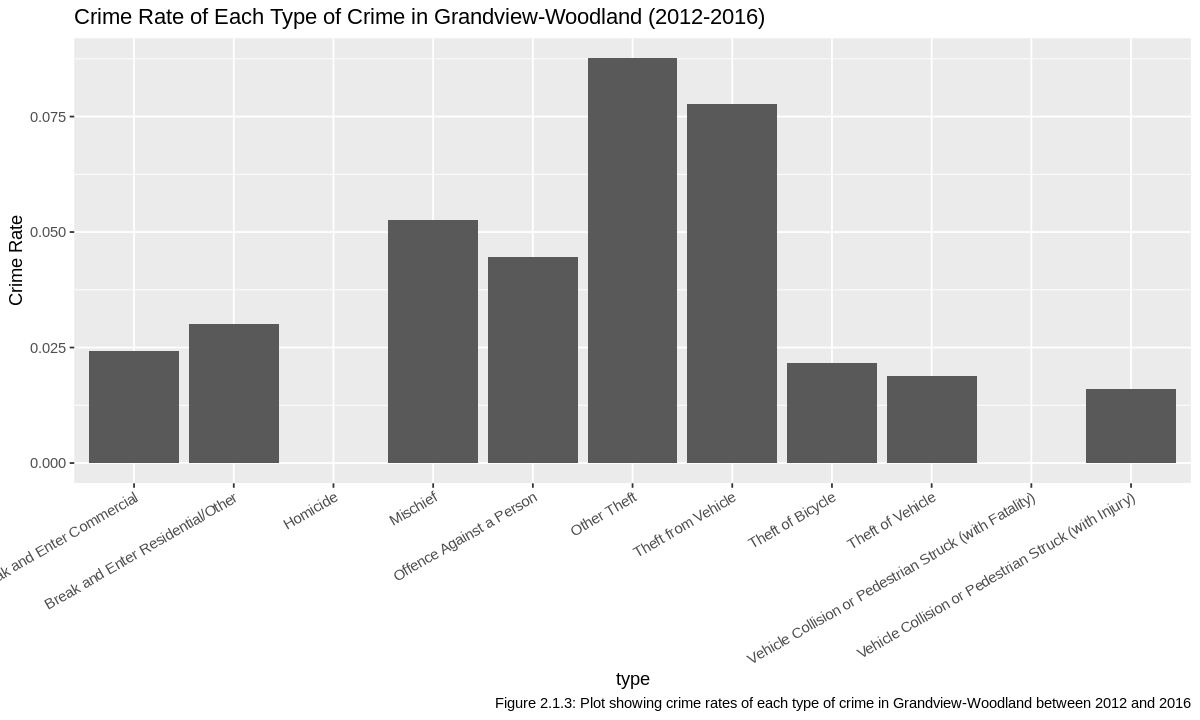

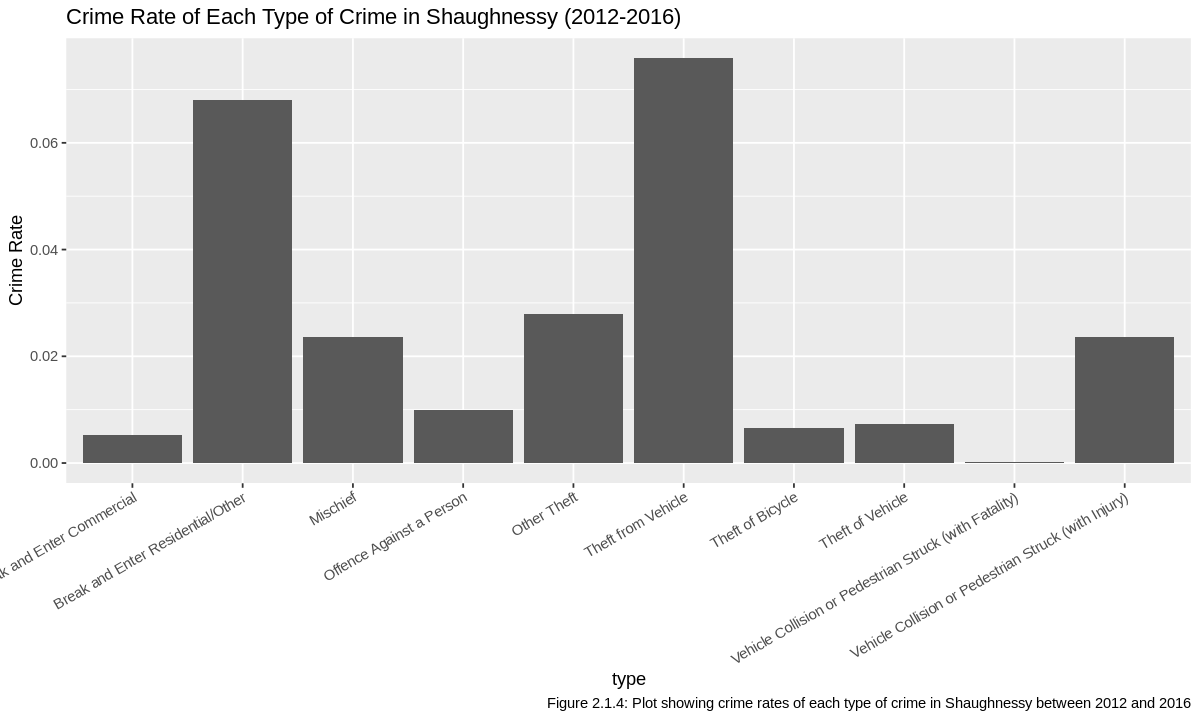

In [6]:
# Add Grandview's population count for the desired years.
grandview_with_pop <- grandview_woodland_clean %>%
    mutate(population = 29175)

# Add Shaughnessy's population count for the desired years.
shaughnessy_with_pop <- shaughnessy_clean %>%
    mutate(population = 8430)

# Group the data and calculated the crime rate for each type of crime with the population in Grandview Woodland at 2016.
grandview_woodland_props <- grandview_with_pop %>%
    group_by(type, population) %>%
    summarise(n = n()) %>%
    mutate(crime_rate = n / population)

# Visualize the crime rate for each type of crime in Grandview-Woodland.
grandview_woodland_prop_bars <- grandview_woodland_props %>%
    ggplot(aes(x = type, y = crime_rate)) +
    geom_bar(stat = 'identity') +
    theme(axis.text.x = element_text(angle = 30, hjust = 1)) +
    ylab("Crime Rate") +
    ggtitle("Crime Rate of Each Type of Crime in Grandview-Woodland (2012-2016)") + 
    labs(caption = "Figure 2.1.3: Plot showing crime rates of each type of crime in Grandview-Woodland between 2012 and 2016")

# Group the data and calculated the crime rate for each type of crime with the population in Shaughnessy at 2016.
shaughnessy_props <- shaughnessy_with_pop %>%
    group_by(type, population) %>%
    summarise(n = n()) %>%
    mutate(crime_rate = n / population)

# Visualize the crime rate for each type of crime.
shaughnessy_props_bars <- shaughnessy_props %>%
    ggplot(aes(x = type, y = crime_rate)) +
    geom_bar(stat = 'identity') +
    theme(axis.text.x = element_text(angle = 30, hjust = 1)) +
    ylab("Crime Rate") +
    ggtitle("Crime Rate of Each Type of Crime in Shaughnessy (2012-2016)") + 
    labs(caption = "Figure 2.1.4: Plot showing crime rates of each type of crime in Shaughnessy between 2012 and 2016")


grandview_woodland_prop_bars
shaughnessy_props_bars

Figure 2.1.3 and 2.1.4 shows that the crime rate is overall higher in Grandview-Woodland than in Shaughnessy between 2012 and 2016, which supports the studies showing a correlation between poverty and crime rates. 

Now, to focus on "Break and Enter Residential/Other" and "Offence Against a Person" crimes, we combined the datasets and filtered the datasets to contain only "Break and Enter Residential/Other" and "Offence Against a Person" crimes. Then the crime rates are visualized for clearer comparative analysis. 

In [7]:
# Combine the two data together
combined <- rbind(shaughnessy_with_pop, grandview_with_pop)

# Combine the the crime rate for both neighbourhood and type of crimes
combined_props <- combined %>%
    group_by(type, neighbourhood, population) %>%
    summarise(n = n()) %>%
    mutate(crime_rate = n / population)

# Select only the two desired crime types 
selected <- combined_props %>%
    filter(type == "Break and Enter Residential/Other" | type == "Offence Against a Person") 

head(selected)

`summarise()` has grouped output by 'type', 'neighbourhood'. You can override
using the `.groups` argument.


type,neighbourhood,population,n,crime_rate
<chr>,<chr>,<dbl>,<int>,<dbl>
Break and Enter Residential/Other,Grandview-Woodland,29175,876,0.030025707
Break and Enter Residential/Other,Shaughnessy,8430,574,0.068090154
Offence Against a Person,Grandview-Woodland,29175,1304,0.044695801
Offence Against a Person,Shaughnessy,8430,84,0.009964413


Figure 2.1.5: Table showing the crime rate of Break and Enter Residential/Other and Offence Against a Person in each neighborhood Grandview-Woodland and Shaughnessy between 2012 and 2016

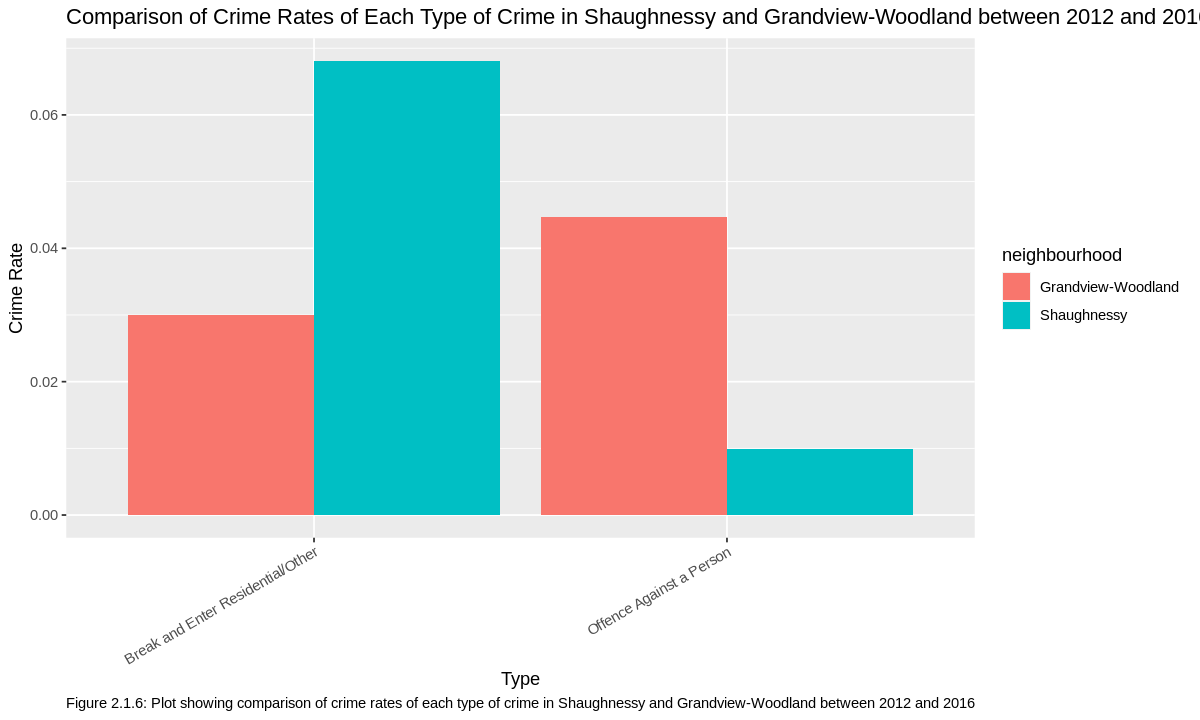

In [8]:
# Visualize the two desired crime types' rates at both neighbourhood and has colored them accordingly
combined_dist <- selected %>%
    ggplot(aes(x = type, y = crime_rate, fill = neighbourhood)) +
    geom_bar(stat="identity", position = "dodge") +
    theme(axis.text.x = element_text(angle = 30, hjust = 1)) +
    labs(x = "Type", y = "Crime Rate") +
    ggtitle("Comparison of Crime Rates of Each Type of Crime in Shaughnessy and Grandview-Woodland between 2012 and 2016") +
    labs(caption = "Figure 2.1.6: Plot showing comparison of crime rates of each type of crime in Shaughnessy and Grandview-Woodland between 2012 and 2016")

combined_dist

Figure 2.1.6 suggests that “Break and Enter Residential/Other” type of crime rate is higher in wealthy neighborhoods while the Offence type of crime rate is lower in such areas. While the data is from trustworthy VPD, it is not enough to conclude them as they are just estimates of the crime rate based on data collected in the span of 5 years. To address this gap, we will use bootstrapping to find a 95% confidence interval of the crime rate of each type of crime in each neighborhood and conduct hypothesis tests with permutation to answer two questions. The alternative hypothesis for the first question will be that "the crime rate of Break and Enter Residential/Other type of crime is higher in Shaughnessy than in Grandview-Woodland," while for the second question, "the crime rate of Offence type of crime is lower in Shaughnessy than in Grandview-Woodland" is the alternative hypothesis. The null hypothesis for both questions will be "the crime rate is the same in both neighborhoods."

We expect to find that the crime rate of "Break and Enter Residential/Other" would be higher and "Offence against a person" would be lower in Shaughnessy than in Grandview Woodland. Therefore, the crime rate depends on the type of crime and neighborhoods.

### 2.2 Confidence Interval
#### We will first focus on "Break and Enter Residential/Other":

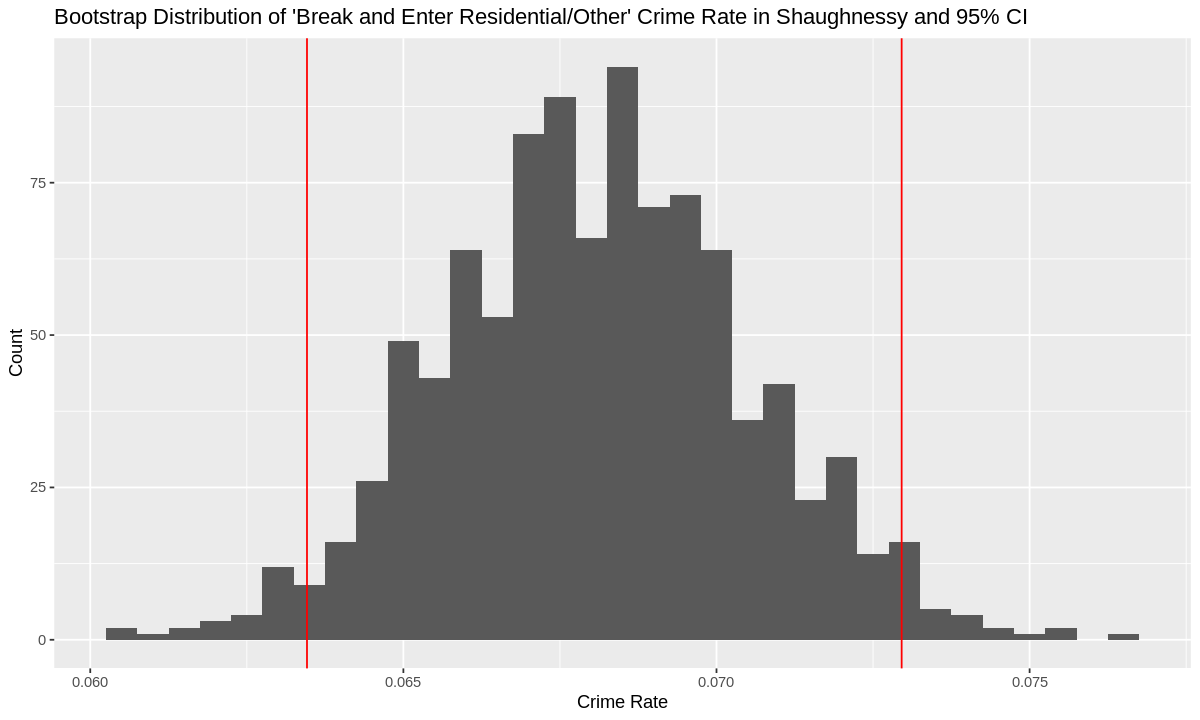

In [9]:
# Bootstrap the cleaned Shaughnessy data with 1000 replicates and original data size
shaughnessy_break_bootstrap <- shaughnessy_clean %>%
    rep_sample_n(size = nrow(shaughnessy_clean), reps = 1000, replace = TRUE) %>%
    group_by(replicate) %>%
    summarise(crime_rate = sum(type == "Break and Enter Residential/Other") / 8430)

# Obtain 95% confidence interval for Shaughnessy
shaughnessy_break_ci <- shaughnessy_break_bootstrap %>%
    get_confidence_interval(level = 0.95, type = "percentile")

# Obtain standard deviation of the bootstrap distribution
shaughnessy_break_sd <- shaughnessy_break_bootstrap %>%
    summarise(sd = sd(crime_rate))

# Visualize the 95% confidence interval on the bootstrapped distribution
shaughnessy_break_bootstrap_dist <- shaughnessy_break_bootstrap %>% ggplot() +
    geom_histogram(aes(x = crime_rate), binwidth = 1/2000) +
    geom_vline(xintercept = shaughnessy_break_ci[[1]], color = "red") +
    geom_vline(xintercept = shaughnessy_break_ci[[2]], color = "red") +
    labs(x = "Crime Rate", y = "Count") +
    ggtitle("Bootstrap Distribution of 'Break and Enter Residential/Other' Crime Rate in Shaughnessy and 95% CI")

# Bootstrap the cleaned Grandview data with 1000 replicates and original data size
grandview_break_bootstrap <- grandview_woodland_clean %>%
    rep_sample_n(size = nrow(grandview_woodland_clean), reps = 1000, replace = TRUE) %>%
    group_by(replicate) %>%
    summarise(crime_rate = sum(type == "Break and Enter Residential/Other") / 29175)

# Obtain 95% confidence interval for Grandview
grandview_break_ci <- grandview_break_bootstrap %>%
    get_confidence_interval(level = 0.95, type = "percentile")

# Obtain standard deviation of the bootstrap distribution
grandview_break_sd <- grandview_break_bootstrap %>%
    summarise(sd = sd(crime_rate))

# Visualize the 95% confidence interval on the bootstrapped distribution
grandview_break_bootstrap_dist <- grandview_break_bootstrap %>% 
    ggplot() +
    geom_histogram(aes(x = crime_rate), binwidth = 1/2000) +
    geom_vline(xintercept = grandview_break_ci[[1]], color = "red") +
    geom_vline(xintercept = grandview_break_ci[[2]], color = "red") +
    labs(x = "Crime Rate", y = "Count") +
    ggtitle("Bootstrap Distribution of 'Break and Enter Residential/Other' Crime Rate in Grandview-Woodland and 95% CI")

shaughnessy_break_bootstrap_dist

In [10]:
shaughnessy_break_ci

lower_ci,upper_ci
<dbl>,<dbl>
0.06346085,0.0729567


Figure 2.2.1: 95% Confidence Interval for the Crime Rate of "Break and Enter Residential/Other" in Shaughnessy

In [11]:
shaughnessy_break_sd

sd
<dbl>
0.002434625


Figure 2.2.2: Standard Deviation of the Bootstrap Distribution of 'Break and Enter Residential/Other' Crime Rate in Shaughnessy

This means that we are 95% confident that the true crime rate of "Break and Enter Residential/Other" in Shaughnessy is between 0.06310498 and 0.07283808, and the estimate of its true standard deviation is 0.002452458.

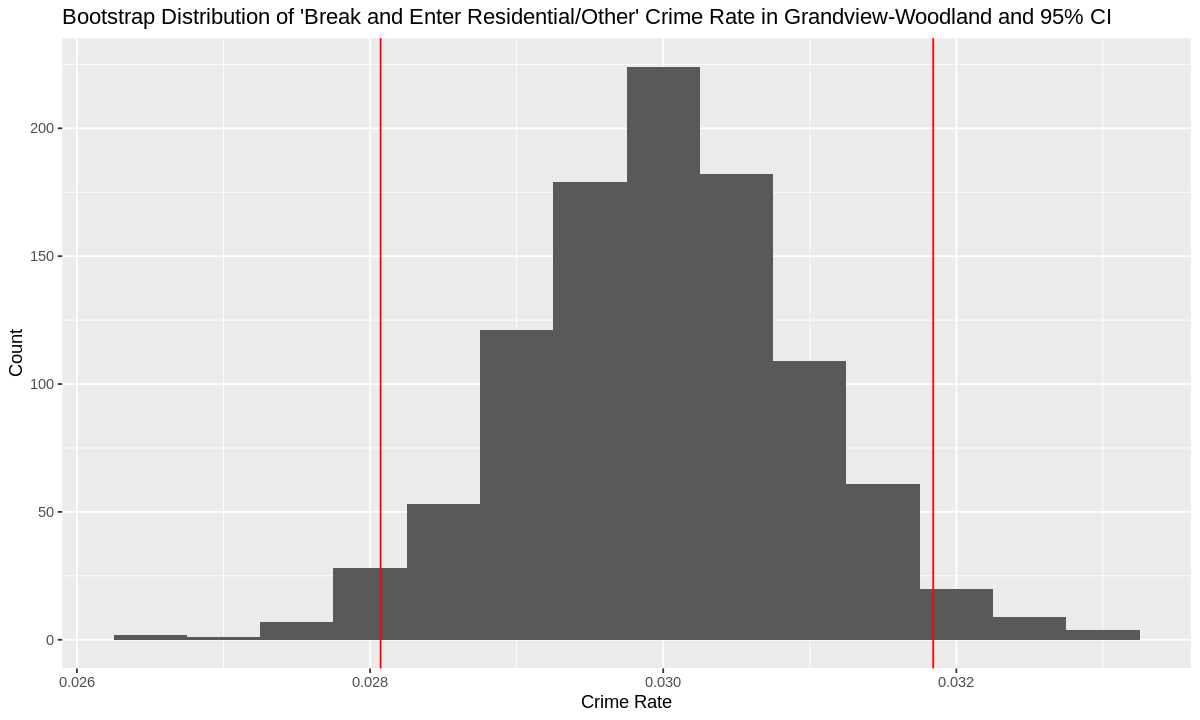

In [12]:
grandview_break_bootstrap_dist

In [13]:
grandview_break_ci

lower_ci,upper_ci
<dbl>,<dbl>
0.02807198,0.03184233


Figure 2.2.3: 95% Confidence Interval for the Crime Rate of "Break and Enter Residential/Other" in Grandview-Woodland

In [14]:
grandview_break_sd

sd
<dbl>
0.0009595618


Figure 2.2.4: Standard Deviation of the Bootstrap Distribution of 'Break and Enter Residential/Other' Crime Rate in Grandview-Woodland

This means that we are 95% confident that the true crime rate of "Break and Enter Residential/Other" in  Grandview-Woodland is between 0.02817481 and 0.03187661, and the estimate of its true standard deviation is 0.0009710814.

#### We will then focus on "Offence Against a Person":

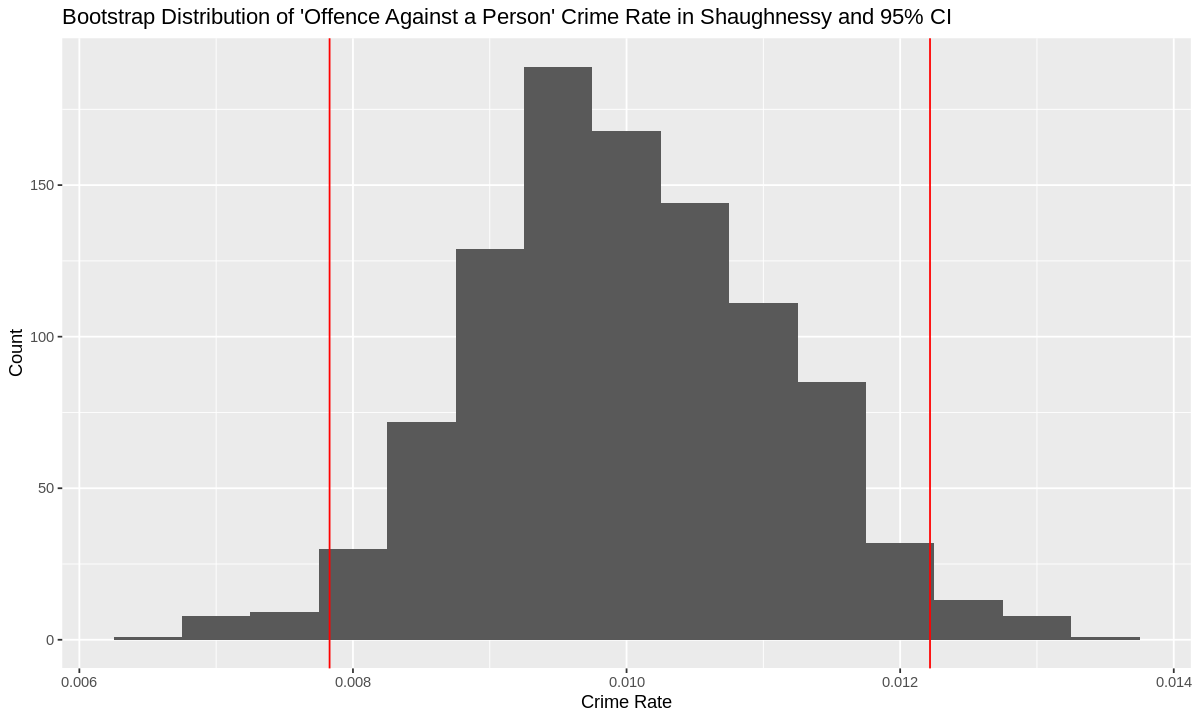

In [15]:
# Bootstrap the cleaned Shaughnessy data with 1000 replicates and original data size
shaughnessy_offence_bootstrap <- shaughnessy_clean %>%
    rep_sample_n(size = nrow(shaughnessy_clean), reps = 1000, replace = TRUE) %>%
    group_by(replicate) %>%
    summarise(crime_rate = sum(type == "Offence Against a Person") / 8430)

# Obtain 95% confidence interval for Shaughnessy
shaughnessy_offence_ci <- shaughnessy_offence_bootstrap %>%
    get_confidence_interval(level = 0.95, type = "percentile")

# Obtain standard deviation of the bootstrap distribution
shaughnessy_offence_sd <- shaughnessy_offence_bootstrap %>%
    summarise(sd = sd(crime_rate))

# Visualize the 95% confidence interval on the bootstrapped distribution
shaughnessy_offence_bootstrap_dist <- shaughnessy_offence_bootstrap %>% ggplot() +
    geom_histogram(aes(x = crime_rate), binwidth = 1/2000) +
    geom_vline(xintercept = shaughnessy_offence_ci[[1]], color = "red") +
    geom_vline(xintercept = shaughnessy_offence_ci[[2]], color = "red") +
    labs(x = "Crime Rate", y = "Count") +
    ggtitle("Bootstrap Distribution of 'Offence Against a Person' Crime Rate in Shaughnessy and 95% CI")

# Bootstrap the cleaned Grandview data with 1000 replicates and original data size
grandview_offence_bootstrap <- grandview_woodland_clean %>%
    rep_sample_n(size = nrow(grandview_woodland_clean), reps = 1000, replace = TRUE) %>%
    group_by(replicate) %>%
    summarise(crime_rate = sum(type == "Offence Against a Person") / 29175)

# Obtain 95% confidence interval for grandview
grandview_offence_ci <- grandview_offence_bootstrap %>%
    get_confidence_interval(level = 0.95, type = "percentile")

# Obtain standard deviation of the bootstrap distribution
grandview_offence_sd <- grandview_offence_bootstrap %>%
    summarise(sd = sd(crime_rate))

grandview_offence_bootstrap_dist <- grandview_offence_bootstrap %>% ggplot() +
    geom_histogram(aes(x = crime_rate), binwidth = 1/2000) +
    geom_vline(xintercept = grandview_offence_ci[[1]], color = "red") +
    geom_vline(xintercept = grandview_offence_ci[[2]], color = "red") +
    labs(x = "Crime Rate", y = "Count") +
    ggtitle("Bootstrap Distribution of 'Offence Against a Person' Crime Rate in Grandview-Woodland and 95% CI")

shaughnessy_offence_bootstrap_dist

In [16]:
shaughnessy_offence_ci

lower_ci,upper_ci
<dbl>,<dbl>
0.007829181,0.01221827


Figure 2.2.5: 95% Confidence Interval for the Crime Rate of "Offence Against a Person" in Shaughnessy

In [17]:
shaughnessy_offence_sd

sd
<dbl>
0.001109605


Figure 2.2.6: Standard Deviation of the Bootstrap Distribution of "Offence Against a Person" Crime Rate in Shaughnessy

This means that we are 95% confident that the true crime rate of "Offence Against a Person" in Shaughnessy is between 0.007829181 and 0.01221827, and the estimate of its true standard deviation is 0.001109605.

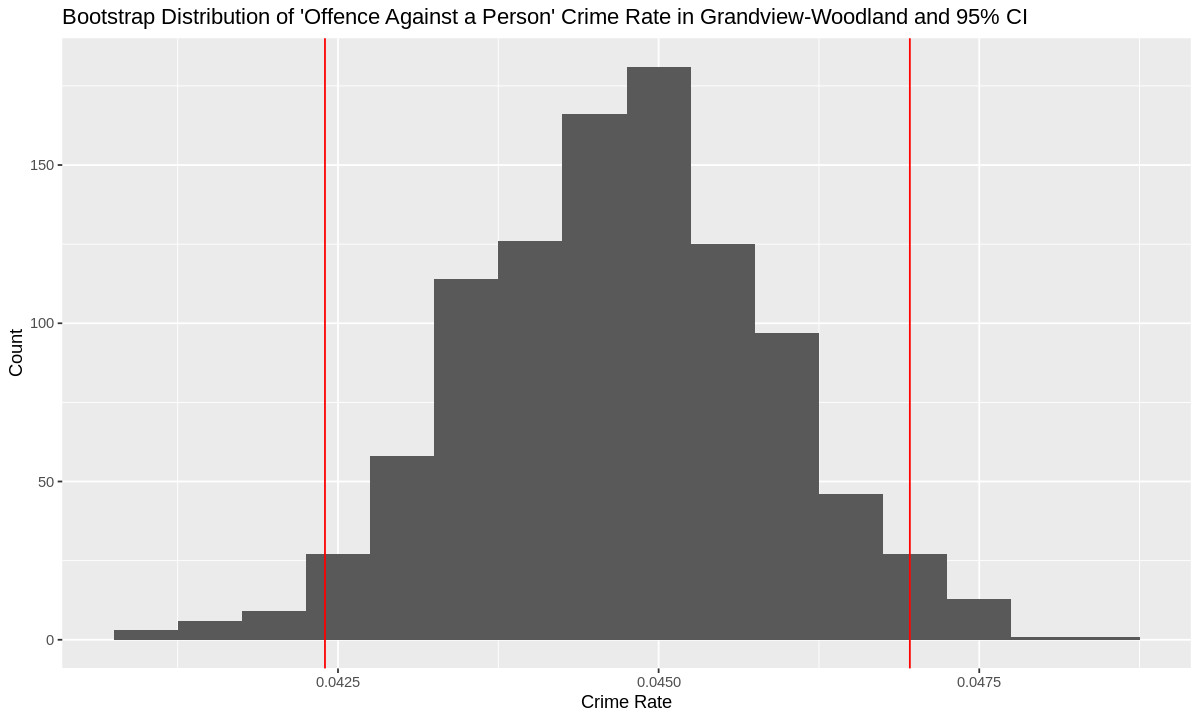

In [18]:
grandview_offence_bootstrap_dist

In [19]:
grandview_offence_ci

lower_ci,upper_ci
<dbl>,<dbl>
0.04239846,0.04695887


Figure 2.2.7: 95% Confidence Interval for the Crime Rate of "Offence Against a Person" in Grandview-Woodland

In [20]:
grandview_offence_sd

sd
<dbl>
0.001168066


Figure 2.2.8: Standard Deviation of the Bootstrap Distribution of "Offence Against a Person" Crime Rate in Grandview-Woodland

This means that we are 95% confident that the true crime rate of "Offence Against a Person" in Grandview-Woodland is between 0.04239846 and 0.04695887, and the estimate of its true standard deviation is 0.001168066.

### 2.3 Hypothesis Test

The null hypothesis: The "Offence Against a Person" crime rate is the same in both neighborhoods.

- Ps - Pg = 0

The alternative hypothesis: The "Offence Against a Person" crime rate is lower in Shaughnessy than in Grandview-Woodland. 

- Ps - Pg < 0

p_value
<dbl>
0.215


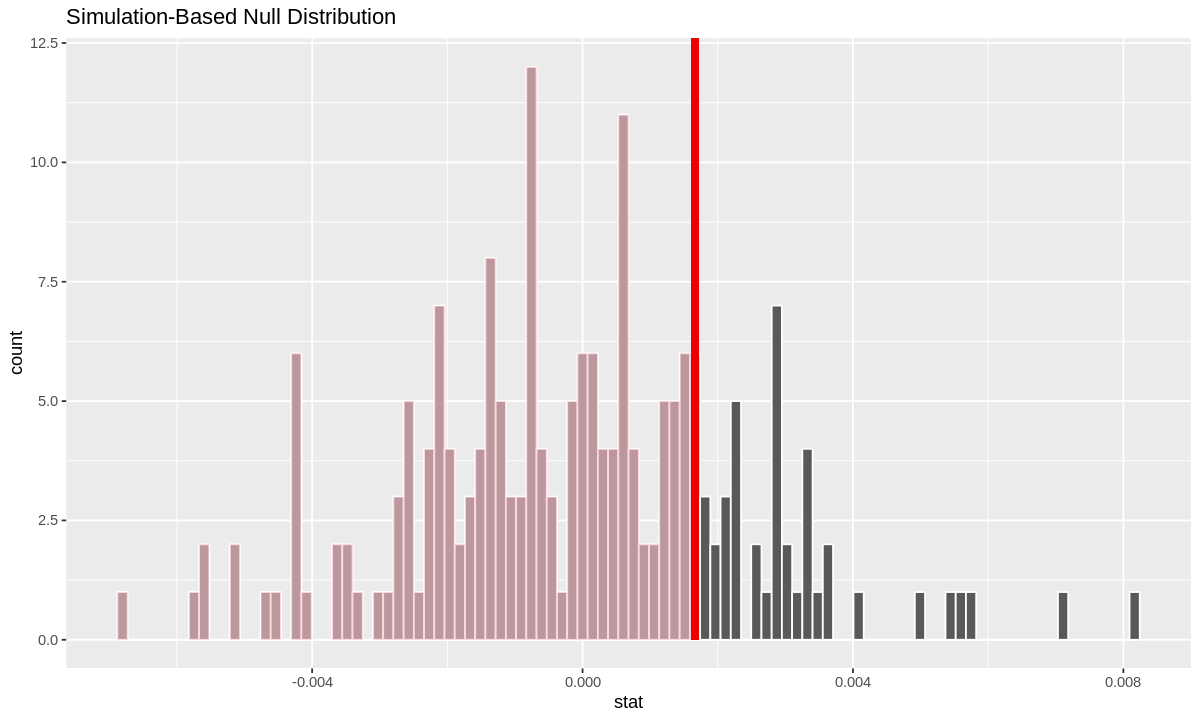

In [23]:
shaughnessy_offence_bootstrap <- shaughnessy_clean %>%
    rep_sample_n(size = nrow(shaughnessy_clean), reps = 100, replace = TRUE) %>%
    group_by(replicate) %>%
    summarise(crime_rate = sum(type == "Offence Against a Person") / 8430, neighbourhood = "Shaughnessy")  %>%
    select(replicate, crime_rate, neighbourhood)

grandview_offence_bootstrap <- grandview_woodland_clean %>%
    rep_sample_n(size = nrow(grandview_woodland_clean), reps = 100, replace = TRUE) %>%
    group_by(replicate) %>%
    summarise(crime_rate = sum(type == "Offence Against a Person") / 29175, neighbourhood = "Grandview-Woodland") %>%
    select(replicate, crime_rate, neighbourhood)

combined <- rbind(shaughnessy_offence_bootstrap, grandview_offence_bootstrap)

# Visualize the null distribution

null_dist <- combined %>%
    specify(formula = crime_rate ~ neighbourhood) %>%
    hypothesize(null = "independence") %>%
    generate(reps = nrow(combined), type = "permute") %>%
    calculate(stat = "diff in means", order= c("Shaughnessy", "Grandview-Woodland"))

obs_diff_mean <- selected %>%
    specify(formula = crime_rate ~ neighbourhood) %>%
    calculate(stat = "diff in means", order= c("Shaughnessy", "Grandview-Woodland"))


visualize(null_dist, bins = 100) + 
    shade_p_value(obs_stat = obs_diff_mean, direction = "left")

null_dist %>%
    get_p_value(obs_stat = obs_diff_mean, direction = "right")

In [ ]:
null_dist %>%
    get_p_value(obs_stat = obs_diff_mean, direction = "left")

## Yuhei's code

In [ ]:
# Bootstrap the cleaned Shaughnessy data with 1000 replicates and original data size
shaughnessy_offence_bootstrap <- shaughnessy_clean %>%
    rep_sample_n(size = nrow(shaughnessy_clean), reps = 1000, replace = TRUE) %>%
    group_by(replicate) %>%
    summarise(crime_rate = sum(type == "Offence Against a Person") / 8430)

head(shaughnessy_offence_bootstrap)

In [ ]:
# Bootstrap the cleaned Grandview data with 1000 replicates and original data size
grandview_offence_bootstrap <- grandview_woodland_clean %>%
    rep_sample_n(size = nrow(grandview_woodland_clean), reps = 1000, replace = TRUE) %>%
    group_by(replicate) %>%
    summarise(crime_rate = sum(type == "Offence Against a Person") / 29175)

head(grandview_offence_bootstrap)

In [ ]:
# Obtain 95% confidence interval 
shaughnessy_offence_ci <- shaughnessy_offence_bootstrap %>%
    get_confidence_interval(level = 0.95, type = "percentile")

shaughnessy_offence_ci

In [ ]:
# Obtain 95% confidence interval 
grandview_offence_ci <- grandview_offence_bootstrap %>%
    get_confidence_interval(level = 0.95, type = "percentile")

grandview_offence_ci

In [ ]:
# Visualize the 95% confidence interval on the bootstrapped distribution
shaughnessy_offence_bootstrap_dist <- shaughnessy_offence_bootstrap %>% ggplot() +
    geom_histogram(aes(x = crime_rate), binwidth = 1/2000) +
    geom_vline(xintercept = shaughnessy_offence_ci[[1]], color = "red") +
    geom_vline(xintercept = shaughnessy_offence_ci[[2]], color = "red")

shaughnessy_offence_bootstrap_dist

In [ ]:
# Visualize the 95% confidence interval on the bootstrapped distribution
grandview_offence_bootstrap_dist <- grandview_offence_bootstrap %>% 
    ggplot() +
    geom_histogram(aes(x = crime_rate), binwidth = 1/2000) +
    geom_vline(xintercept = grandview_offence_ci[[1]], color = "red") +
    geom_vline(xintercept = grandview_offence_ci[[2]], color = "red")

grandview_offence_bootstrap_dist

In [ ]:
combined$is_offence <- combined$type == "Offence Against a Person"

# Visualize the null distribution
null_dist <- combined %>%
    select(is_offence, neighbourhood, population) %>%
    # filter(type == "Offence Against a Person" | type == "Break and Enter Residential/Other") %>%
    specify(formula = is_offence ~ neighbourhood, success = "TRUE") %>%
    hypothesize(null = "independence") %>%
    generate(reps = 1000, type = "permute") %>%
    # calculate(stat = "diff in props")
    group_by(replicate) %>%
    summarise(rate = (sum(is_offence == "TRUE" & neighbourhood == "Grandview-Woodland") / 29175)
                 - (sum(is_offence == "TRUE" & neighbourhood == "Shaughnessy") / 8430)) %>%
    mutate(rate = rate + (0 - mean(rate)))

null_dist %>%
    ggplot() +
    geom_histogram(aes(x = rate), binwidth = 1/2000)

In [ ]:
obs_stat

In [ ]:
# Calculate the observed difference in the order Shaughnessy - Grandview-Woodland"
obs_diff <- diff(obs_stat$crime_rate)

obs_diff

In [ ]:
# Get p-value
p_value <- mean(null_dist$rate > abs(obs_diff))

p_value

## Part 3: Discussion

Based on this, we can expect a crime pattern in a neighborhood based on income level and provide security measures tailored to each neighborhood to prevent crime more effectively.

This project can lead to future questions of if there are any other factors that affect the crime rate and on the effectiveness of existing security measures in each area at preventing crimes.

## Part 4: References

Grandview-Woodland Neighborhood Social Indicators Profile 2020. City of Vancouver. (2020). Retrieved March 19, 2023, from https://vancouver.ca/files/cov/social-indicators-profile-grandview-woodland.pdf 

Norrie, A. W., & Cambridge Core EBA eBooks Complete Collection. (2014). Crime, reason and history: A critical introduction to criminal law (Third ed.). Cambridge University Press. https://doi.org/10.1017/CBO9781139031851

Shaughnessy Neighborhood Social Indicators Profile 2020. City of Vancouver. (2020). https://vancouver.ca/files/cov/social-indicators-profile-shaughnessy.pdf

Sugiharti, L., Purwono, R., Esquivias, M. A., &amp; Rohmawati, H. (2023). The nexus between crime rates, poverty, and income inequality: A case study of indonesia. Economies, 11(2), 62. https://doi.org/10.3390/economies11020062 

The Vancouver Police Department. Crime Data [Data set]. https://geodash.vpd.ca/opendata/#

Zhang, W. (2013). The relationships between crime rate and income inequality: Evidence from China. The University of Texas at Austin. https://doi.org/https://repositories.lib.utexas.edu/handle/2152/22551 